In [1]:
import PhotochemPy as photo
pt = photo.PhotochemPy('input/species.dat','input/reactions.rx')

In [1]:
import numpy as np
from Photochem import photochem
import time

In [2]:
nz = 200
nq = 63
nnp = 4
nsp = 74
nr = 392
ks = 33
kj = 60
photochem.allocate_memory(nz,nq,nnp,nsp,nr,ks,kj)
# now read input files
photochem.read_species('input/species.dat')
photochem.read_reactions('input/reactions.rx')
photochem.read_atmosphere('input/atmosphere.txt')
photochem.photgrid(100.0e5)

# these should be done in initphoto!
photochem.initphoto('input/sun_flux.txt')
photochem.initmie(photochem.nw,photochem.wavl,1,0)

In [3]:
print(photochem.initmie.__doc__)

initmie(nw,wl,frak,ihztype,[kw])

Wrapper for ``initmie``.

Parameters
----------
nw : input int
wl : input rank-1 array('d') with bounds (kw)
frak : input int
ihztype : input int

Other Parameters
----------------
kw : input int, optional
    Default: len(wl)



In [12]:
photochem.ghc[:118]

array([[4.89680743e-04, 1.95732189e-03, 4.39918700e-03, ...,
        9.04034137e-01, 9.05876094e-01, 9.13419334e-01],
       [4.68250000e-04, 1.87165000e-03, 4.20695000e-03, ...,
        9.63695400e-01, 9.65284100e-01, 9.75043900e-01],
       [4.35900000e-04, 1.74240000e-03, 3.91655000e-03, ...,
        9.61213500e-01, 9.62592950e-01, 9.73331600e-01],
       ...,
       [1.02500000e-05, 4.09500000e-05, 9.21000000e-05, ...,
        9.12063050e-01, 9.13834450e-01, 9.43224500e-01],
       [1.02500000e-05, 4.09000000e-05, 9.20000000e-05, ...,
        9.11727450e-01, 9.13510350e-01, 9.43226750e-01],
       [4.35174989e-08, 1.73224996e-07, 3.89967490e-07, ...,
        3.85126950e-03, 3.85882760e-03, 3.98513524e-03]])

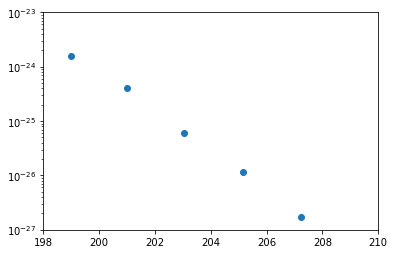

In [19]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots(1,1)

ax.plot(photochem.wav[0:118]/10,photochem.sq[6,0,:118],'o')

ax.set_xlim(198,210)
ax.set_ylim(1e-27,1e-23)

ax.set_yscale('log')

In [17]:
photochem.wavl[0:118]

array([1210., 1300., 1350., 1400., 1450., 1500., 1550., 1600., 1650.,
       1700., 1754., 1770., 1786., 1802., 1818., 1835., 1852., 1869.,
       1887., 1905., 1923., 1942., 1961., 1980., 2000., 2020., 2041.,
       2062., 2083., 2105., 2128., 2151., 2174., 2200., 2222., 2247.,
       2273., 2299., 2326., 2353., 2381., 2410., 2439., 2469., 2500.,
       2532., 2564., 2597., 2632., 2667., 2703., 2740., 2778., 2817.,
       2857., 2899., 2941., 2985., 3030., 3077., 3125., 3175., 3225.,
       3275., 3325., 3375., 3425., 3450., 3550., 3650., 3750., 3850.,
       3950., 4050., 4150., 4250., 4350., 4450., 4550., 4650., 4750.,
       4850., 4950., 5050., 5150., 5250., 5350., 5450., 5550., 5650.,
       5750., 5850., 5950., 6050., 6150., 6250., 6350., 6450., 6550.,
       6650., 6750., 6850., 6950., 7050., 7150., 7250., 7350., 7450.,
       7550., 7650., 7750., 7850., 7950., 8050., 8150., 8250., 8350.,
       8450.])

In [5]:
lower_wv = 121 # lower bound of consideration (nm)
upper_wv = 800 # upper bound

def photgrid(star_file):
    wv,I = np.loadtxt(star_file).T
    bins = np.linspace(lower_wv,upper_wv,nw+1)
    # calculate photons/cm2/s for each bin
    F = np.zeros(nw)
    for j in range(len(bins)-1):
        ind = np.where((wv>bins[j]) & (wv<bins[j+1]))[0]
        c = 3e8 #m/s2
        h = 6.62607004e-34 #Planks constant in SI units
        FF = 0
        for i in ind:
            E = h*c/(wv[i]*1e-9) # joules/photon
            FF += I[i]*(wv[i+1]-wv[i])/1e7/E #photons/(cm2 s)
        F[j] = FF
    return F

In [6]:
Flux = photgrid('input/sun_flux.txt')

In [7]:
photochem.flux = Flux

In [13]:
def profile2dic(filename):
    file = open(filename,'r')
    lines = file.readlines()
    key = lines[0].split()
    #build dictionary of output
    out = []
    for i in range(1,len(lines)):
        tmp = []
        for j in lines[i].split():
            try:
                tmp.append(float(j))
            except ValueError:
                tmp.append(0)
        out.append(tmp)
    out = np.array(out)

    f_out = {}
    for i in range(0,len(key)):
        f_out[key[i]]=out[:,i]
    file.close()

    return f_out

In [14]:
# loads atmosphere
f = profile2dic('atmosphere.txt')
usol = np.zeros([63,200])
k= 0
for i,key in enumerate(f.keys()):
    if i>3:
        usol[k] = f[key]
        k+=1

In [16]:
usol.flatten(order='F')

array([2.496e-16, 8.885e-16, 6.294e-03, ..., 3.436e-12, 1.000e-04,
       9.992e-01])

In [17]:
usol[:,0]

array([2.496e-16, 8.885e-16, 6.294e-03, 1.027e-11, 1.788e-15, 1.872e-17,
       3.890e-17, 1.860e-04, 6.604e-08, 6.924e-13, 3.724e-16, 8.232e-16,
       4.717e-03, 1.318e-11, 2.434e-15, 1.629e-17, 4.876e-17, 1.860e-04,
       6.607e-08, 6.593e-13, 6.161e-16, 7.930e-16, 3.373e-03, 1.583e-11,
       3.061e-15, 1.491e-17, 6.276e-17, 1.860e-04, 6.612e-08, 6.159e-13,
       1.126e-15, 7.769e-16, 2.387e-03, 1.866e-11, 3.772e-15, 1.396e-17,
       8.115e-17, 1.860e-04, 6.619e-08, 5.711e-13, 2.217e-15, 7.699e-16,
       1.672e-03, 2.182e-11, 4.611e-15, 1.329e-17, 1.042e-16, 1.860e-04,
       6.630e-08, 5.272e-13, 4.569e-15, 7.830e-16, 1.131e-03, 2.497e-11,
       5.542e-15, 1.305e-17, 1.317e-16, 1.860e-04, 6.645e-08, 4.827e-13,
       9.465e-15, 1.000e-04, 9.792e-01])

In [18]:
lda = len(usol[:,0])*3+1
t = 0.0
jacob = photochem.jacobian(t,usol.flatten(order='F'),lda)

In [20]:
jacob.shape

(190, 12600)

In [12]:
# here we will read in species
fil = open('input/species.dat','r')
lines = fil.readlines()
for line in lines:
    if line[0] == '*':
#         print(line,end='')
        pass